# Installing the necessary libs

In [19]:
!pip install panda
!pip install facenet-pytorch
from PIL import Image
import pandas as pd
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import cv2

In [49]:
#from facenet_pytorch import MTCNN   # eta dye face_detect krte pri nai
from mtcnn import MTCNN


#  dui MTCNN alada facenet er tai .detect dya and porer tay detect_faces dya face detect kre
#pip install mtcnn


In [3]:
import shutil

source_dir = '/kaggle/input/lethaa/letha'

# Destination directory
destination_dir = '/kaggle/working/chobi'

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/chobi'

In [4]:
data_dir = '/kaggle/working/chobi'

batch_size = 32
epochs = 8
workers = 0 if os.name == 'nt' else 8
#workers determines the number of subprocesses to use for data loading. This parameter is used to parallelize data loading operations, which can significantly speed up training.
#If the operating system (os.name) is Windows ('nt'), workers is set to 0, indicating that data loading will be done in the main process. This is because Windows does not support the fork method used by Unix-like systems for multiprocessing.
#If the operating system is not Windows (assuming a Unix-like system), workers is set to 8, meaning data loading will use 8 subprocesses to load data in parallel.s

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [55]:
mtcnn = MTCNN(
    min_face_size=20,
    steps_threshold=[0.6, 0.7, 0.7], scale_factor=0.709,
    
)
# this one is not the facenet one ; i did face detection with b_box with this one 


In [ ]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

#this one is the facenet one;

In [58]:
help(MTCNN.)

Help on function detect_faces in module mtcnn.mtcnn:

detect_faces(self, img) -> list
    Detects bounding boxes from the specified image.
    :param img: image to process
    :return: list containing all the bounding boxes detected with their keypoints.



In [64]:
from facenet_pytorch import MTCNN 
mtcnn = MTCNN(
    image_size=160, margin=5, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)


dataset = datasets.ImageFolder(data_dir, transform=transforms.Resize((512, 512)))
dataset.samples = [
    (p, p.replace(data_dir, data_dir + '_cropped'))
        for p, _ in dataset.samples
]
        
loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    collate_fn=training.collate_pil
)


for i, (x, y) in enumerate(loader):
    mtcnn(x, save_path=y)
    print('\rBatch {} of {}'.format(i + 1, len(loader)), end='')
    
# Remove mtcnn to reduce GPU memory usage
del mtcnn

Batch 1 of 1

# ***BOUNDING BOX CREATION***

0it [00:00, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


1it [00:02,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


2it [00:04,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


3it [00:06,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


4it [00:08,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


5it [00:10,  2.08s/it]


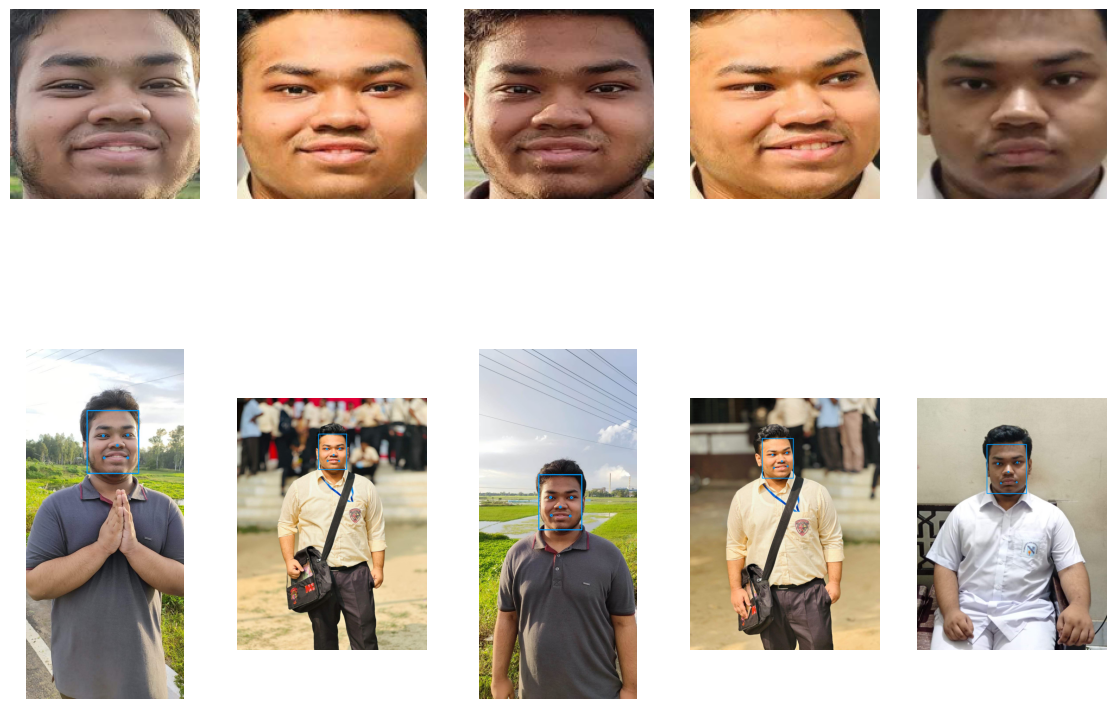

In [72]:


PATH = '/kaggle/working/chobi/tonoy/'

# Create an instance of MTCNN with specified parameters
mtcnn = MTCNN(min_face_size=20, steps_threshold=[0.6, 0.7, 0.7], scale_factor=0.709)

# Function to extract a face and draw bounding box and keypoints
def extract_face_and_draw(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    
    detector = mtcnn
    results = detector.detect_faces(pixels)
    
    if len(results) == 0:
        raise ValueError("No faces detected in the image.")
    
    # Extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(int(x1)), abs(int(y1))  # Ensure coordinates are positive integers
    x2, y2 = x1 + int(width), y1 + int(height)
    
    # Ensure the coordinates are within the image bounds
    x2 = min(x2, pixels.shape[1])
    y2 = min(y2, pixels.shape[0])
    
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    # Draw bounding box and keypoints
    img_with_dets = pixels.copy()
    min_conf = 0.9
    for det in results:
        if det['confidence'] >= min_conf:
            x, y, width, height = det['box']
            keypoints = det['keypoints']
            cv2.rectangle(img_with_dets, (x, y), (x + width, y + height), (0, 155, 255), 4)
            cv2.circle(img_with_dets, (keypoints['left_eye']), 4, (0, 155, 255), 4)
            cv2.circle(img_with_dets, (keypoints['right_eye']), 4, (0, 155, 255), 4)
            cv2.circle(img_with_dets, (keypoints['nose']), 4, (0, 155, 255), 4)
            cv2.circle(img_with_dets, (keypoints['mouth_left']), 4, (0, 155, 255), 4)
            cv2.circle(img_with_dets, (keypoints['mouth_right']), 4, (0, 155, 255), 4)
    
    return face_array, img_with_dets

plt.figure(figsize=(20, 10))
for i, filename in tqdm(enumerate(os.listdir(PATH))):
    path = os.path.join(PATH, filename)
    
    try:
        face, img_with_dets = extract_face_and_draw(path)
        
        plt.subplot(2, 7, i + 1)
        plt.axis('off')
        plt.imshow(face)
        
        plt.subplot(2, 7, i + 8)  # Adjust subplot position for detections
        plt.axis('off')
        plt.imshow(img_with_dets)
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

plt.show()


# *** MODEL TRAINING ***

In [73]:
resnet = InceptionResnetV1(
    classify=True,
    pretrained='vggface2',
    num_classes=len(dataset.class_to_idx)
)

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [74]:
#  do pay heed 
abc=(dataset.class_to_idx)
print(abc)

{'niloy': 0, 'nirmal': 1, 'tonoy': 2}


In [21]:
help(InceptionResnetV1)

In [77]:
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
scheduler = MultiStepLR(optimizer, [5, 10])

trans = transforms.Compose([
    np.float32,
    transforms.ToTensor(),
    fixed_image_standardization
])
dataset = datasets.ImageFolder(data_dir + '_cropped', transform=trans)
img_inds = np.arange(len(dataset))
np.random.shuffle(img_inds)
train_inds = img_inds[:int(0.8 * len(img_inds))]
val_inds = img_inds[int(0.8 * len(img_inds)):]

train_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(train_inds)
)
val_loader = DataLoader(
    dataset,
    num_workers=workers,
    batch_size=batch_size,
    sampler=SubsetRandomSampler(val_inds)
)

In [78]:
loss_fn = torch.nn.CrossEntropyLoss()
metrics = {
    'fps': training.BatchTimer(),
    'acc': training.accuracy
}

In [ ]:
help(resnet.eval)



# try the loss function with triplet loss function

In [79]:
writer = SummaryWriter()
writer.iteration, writer.interval = 0, 10

print('\n\nInitial')
print('-' * 10)
resnet.eval()
training.pass_epoch(
    resnet, loss_fn, val_loader,
    batch_metrics=metrics, show_running=True, device=device,
    writer=writer
)

for epoch in range(epochs):
    print('\nEpoch {}/{}'.format(epoch + 1, epochs))
    print('-' * 10)

    resnet.train()
    training.pass_epoch(
        resnet, loss_fn, train_loader, optimizer, scheduler,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

    resnet.eval()
    training.pass_epoch(
        resnet, loss_fn, val_loader,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

writer.close()



Initial
----------
Valid |     1/1    | loss:    0.7480 | fps:    0.0514 | acc:    0.6667   

Epoch 1/8
----------
Train |     1/1    | loss:    1.4313 | fps:    4.3441 | acc:    0.0909   
Valid |     1/1    | loss:    0.0836 | fps:    2.6375 | acc:    1.0000   

Epoch 2/8
----------
Train |     1/1    | loss:    0.0944 | fps:    3.1595 | acc:    1.0000   
Valid |     1/1    | loss:    0.0027 | fps:    2.9300 | acc:    1.0000   

Epoch 3/8
----------
Train |     1/1    | loss:    0.0480 | fps:    3.6859 | acc:    1.0000   
Valid |     1/1    | loss:    0.0001 | fps:    2.8900 | acc:    1.0000   

Epoch 4/8
----------
Train |     1/1    | loss:    0.0024 | fps:    3.6814 | acc:    1.0000   
Valid |     1/1    | loss:    0.0000 | fps:    2.8800 | acc:    1.0000   

Epoch 5/8
----------
Train |     1/1    | loss:    0.0025 | fps:    3.4364 | acc:    1.0000   
Valid |     1/1    | loss:    0.0000 | fps:    2.9211 | acc:    1.0000   

Epoch 6/8
----------
Train |     1/1    | loss:    0.0

# ***THE MODEL IS CREATED MAINLY BASED ON THE MTCNN() OF FACENET-PYTORCH NOT THE mtcnn.MTCNN()***

In [81]:
from facenet_pytorch import MTCNN 
mtcnn = MTCNN(
    image_size=160, margin=5, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)



aligned = []
names = []

for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
        print(prob)
        aligned.append(x_aligned)
        print(x)
        
        for file_path in y:  # Iterate over each file path in y
            class_name = os.path.basename(os.path.dirname(file_path))
            print(class_name)
            print(file_path)
            names.append(class_name)


[[0.99993753]
 [0.99998224]
 [0.99988127]
 [0.99998665]
 [0.9953656 ]
 [0.9999994 ]
 [0.99997556]
 [0.99998283]
 [0.9999826 ]
 [0.92677546]
 [0.995871  ]
 [0.9999989 ]
 [0.9999933 ]
 [0.9999914 ]]
[<PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4D270>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4E200>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4FF70>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4EF80>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4EBF0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4EEC0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4CF40>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4D420>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4FEE0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4C190>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4F130>, <PIL.Image.Image image mode=RGB size=512x512 at 0x792707C4C580>, <PIL.Image.Image image

In [82]:
prob

array([[0.99993753],
       [0.99998224],
       [0.99988127],
       [0.99998665],
       [0.9953656 ],
       [0.9999994 ],
       [0.99997556],
       [0.99998283],
       [0.9999826 ],
       [0.92677546],
       [0.995871  ],
       [0.9999989 ],
       [0.9999933 ],
       [0.9999914 ]], dtype=float32)

In [ ]:
x_aligned  # gives tensor as output 

In [84]:
aligned =x_aligned
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

In [85]:
data = [embeddings, names]
torch.save(data, 'data.pt') # saving data.pt file

In [86]:
import pickle


with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)


In [91]:
def face_match(img_path, data_path): # img_path= location of photo, data_path= location of data.pt 
    # getting embedding matrix of the given img
    img = Image.open(img_path)
    face, prob = mtcnn(img, return_prob=True) # returns cropped face and probability
    emb = resnet(face.unsqueeze(0)).detach() # detech is to make required gradient false
    
    #face = face.to(device)
    #emb = resnet(face).detach().cpu()
    
    saved_data = torch.load('data.pt') # loading data.pt file
    embedding_list = saved_data[0] # getting embedding data
    name_list = saved_data[1] # getting list of names
    dist_list = [] # list of matched distances, minimum distance is used to identify the person
    
    for idx, emb_db in enumerate(embedding_list):
        dist = torch.dist(emb, emb_db).item()
        dist_list.append(dist)
        
    idx_min = dist_list.index(min(dist_list))
    return (name_list[idx_min], min(dist_list))


result = face_match('/kaggle/input/wpslxdwis/89e52cea-1cbf-4658-8bcd-ba8b963a9ddc.png', 'data.pt')

print('Face matched with: ',result[0], 'With distance: ',result[1])

Face matched with:  niloy With distance:  0.3350173532962799


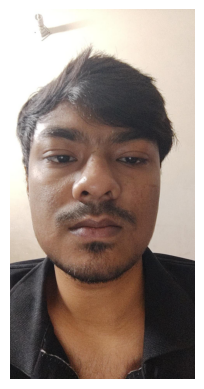

tensor([[[ 0.9961,  0.9961,  0.9961,  ...,  0.8398,  0.8242,  0.8320],
         [ 0.9961,  0.9961,  0.9961,  ...,  0.8320,  0.8398,  0.8398],
         [ 0.9961,  0.9961,  0.9961,  ...,  0.8320,  0.8398,  0.8320],
         ...,
         [-0.5430, -0.5508, -0.5195,  ..., -0.7383, -0.7070, -0.7305],
         [-0.3945, -0.3867, -0.3945,  ..., -0.7695, -0.7617, -0.7148],
         [-0.4492, -0.4570, -0.5195,  ..., -0.7852, -0.7773, -0.7539]],

        [[ 0.9961,  0.9961,  0.9961,  ...,  0.7305,  0.7148,  0.7148],
         [ 0.9961,  0.9961,  0.9961,  ...,  0.7227,  0.7305,  0.7227],
         [ 0.9961,  0.9961,  0.9961,  ...,  0.7227,  0.7305,  0.7227],
         ...,
         [-0.5508, -0.5664, -0.5352,  ..., -0.7383, -0.7070, -0.7383],
         [-0.4102, -0.4023, -0.4102,  ..., -0.7695, -0.7617, -0.7227],
         [-0.4570, -0.4727, -0.5352,  ..., -0.7852, -0.7773, -0.7617]],

        [[ 0.9961,  0.9961,  0.9961,  ...,  0.6289,  0.6133,  0.6133],
         [ 0.9961,  0.9961,  0.9961,  ...,  0

0.9999933242797852

In [104]:
img = Image.open('/kaggle/input/wpslxdwis/89e52cea-1cbf-4658-8bcd-ba8b963a9ddc.png')
face, prob = mtcnn(img, return_prob=True)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
print(face)
prob

In [ ]:
help(torch.dist)
help(mtcnn)

In [101]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
print(pd.DataFrame(dists, columns=names, index=names))

            niloy      niloy      niloy      niloy      niloy     nirmal  \
niloy    0.000000   1.338006   1.604238   1.500171   3.550012   8.175306   
niloy    1.338006   0.000000   0.383263   0.401817   4.839721   6.871566   
niloy    1.604238   0.383263   0.000000   0.165892   5.145240   6.720204   
niloy    1.500171   0.401817   0.165892   0.000000   5.047586   6.857982   
niloy    3.550012   4.839721   5.145240   5.047586   0.000000  11.399075   
nirmal   8.175306   6.871566   6.720204   6.857982  11.399075   0.000000   
nirmal   8.988592   7.696164   7.555453   7.692708  12.160675   0.865619   
nirmal   8.775924   7.521396   7.420050   7.561019  11.819014   1.194699   
nirmal   5.729263   4.460540   4.357714   4.497733   8.899014   2.501407   
tonoy    4.152952   3.202417   2.819338   2.836223   7.590083   6.297921   
tonoy   13.042002  11.942625  11.573039  11.630285  16.496872   9.211898   
tonoy    4.356437   3.064137   2.754603   2.858318   7.896399   4.541387   
tonoy    8.5

# qn : training je korailam kisher training eta ta note down?


In [ ]:

# ## eta baad
# ctrl  +    '+'    +    '/' dile shob comment out hoy 

# face_list = [] # list of cropped faces from photos folder
# name_list = [] # list of names corrospoing to cropped photos
# embedding_list = [] # list of embeding matrix after conversion from cropped faces to embedding matrix using resnet

# for img, idx in loader:
#     face, prob = mtcnn(img, return_prob=True) 
#     if face is not None: # if face detected and porbability > 90% avoided
#         emb = resnet(face.unsqueeze(0)) # passing cropped face into resnet model to get embedding matrix
#         embedding_list.append(emb.detach()) # resulten embedding matrix is stored in a list
#         name_list.append(idx_to_class[idx]) # names are stored in a list




older one 






# #from facenet_pytorch import MTCNN   # eta dye face_detect krte pri nai
# #from mtcnn import MTCNN


# #  dui MTCNN alada facenet er tai .detect dya and porer tay detect_faces dya face detect kre
# #pip install mtcnn




# from mtcnn import MTCNN    # n.b:


# mtcnn = MTCNN(
#     min_face_size=20,
#     steps_threshold=[0.6, 0.7, 0.7], scale_factor=0.709,
    
# )
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# from mtcnn import MTCNN
# from tqdm import tqdm

# PATH = '/kaggle/working/chobi/tonoy/'

# def extract_face(filename, required_size=(160, 160)):
#     image = Image.open(filename)
#     image = image.convert('RGB')
#     pixels = np.asarray(image)
    
#     detector = mtcnn
#     results = detector.detect_faces(pixels)
    
#     if len(results) == 0:
#         raise ValueError("No faces detected in the image.")
    
#     # Extract the bounding box from the first face
#     x1, y1, width, height = results[0]['box']
#     x1, y1 = abs(int(x1)), abs(int(y1))  # Ensure coordinates are positive integers
#     x2, y2 = x1 + int(width), y1 + int(height)
    
#     # Ensure the coordinates are within the image bounds
#     x2 = min(x2, pixels.shape[1])
#     y2 = min(y2, pixels.shape[0])
    
#     face = pixels[y1:y2, x1:x2]
    
#     image = Image.fromarray(face)
#     image = image.resize(required_size)
#     face_array = np.asarray(image)
    
#     return face_array

# plt.figure(figsize=(10, 5))
# for i, filename in tqdm(enumerate(os.listdir(PATH))):
#     path = os.path.join(PATH, filename)
    
#     try:
#         face = extract_face(path)
        
#         plt.subplot(2, 7, i + 1)
#         plt.axis('off')
#         plt.imshow(face)
#         r
#     except Exception as e:
#         print(f"Error processing file {filename}: {e}")

# plt.show()


In [ ]:
# 